In [2]:
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.api import OLS
from matplotlib import pyplot as plt
import seaborn as sn # for heat map
import pandas as pd

In [3]:
# ideally, a independent variables should not 
# be correlated among themselves
# we're going to use the estimated multiple
# regression equation

# ŷ = b0 + b1x1 + b2x2 + ... bpxp

# BLUE lines are for correlation comparisons 
# between indepedendent variables

# RED are between DEPENDENT and INDEPENDENT

In [4]:
miles_traveled = np.asarray([89, 66, 78, 111, 44, 77, 80, 66, 109, 76])
num_deliveries = np.asarray([4, 1, 3, 6, 1, 3, 3, 2, 5, 3])
gas_price = np.asarray([3.84, 3.19, 3.78, 3.89, 3.57, 3.57, 3.03, 
            3.51, 3.54, 3.25])
travel_time = np.asarray([7, 5.4, 6.6, 7.4, 4.8, 6.4, 7,
                  5.6, 7.3, 6.4])

In [5]:
data = {
    "Miles travelled": miles_traveled,
    "Number of deliveries": num_deliveries,
    "Gas price": gas_price,
    "Travel time in hours": travel_time
}
df = pd.DataFrame(data, columns=["Miles travelled", 
                                 "Number of deliveries",
                                "Gas price",
                                "Travel time in hours"])

In [22]:
def plot_regression_line(dependent_variable,independent_variable, color):
    slope, intercept, r_value, p_value, std_err = stats.linregress(independent_variable, dependent_variable)
    
    # independent variable goes on the x axis
    plt.plot(independent_variable, dependent_variable, 'o', label="original",)
    plt.plot(independent_variable, intercept + slope * independent_variable, color, label="fitted")
    plt.legend()
    plt.show()
    print("slope:\t\t{}\nintercept:\t{}\nr:\t\t{}\np:\t\t{}\nstd_err:\t{}".format(slope, intercept, r_value, p_value, std_err))
    print("R squared:\t{}".format(r_value**2))

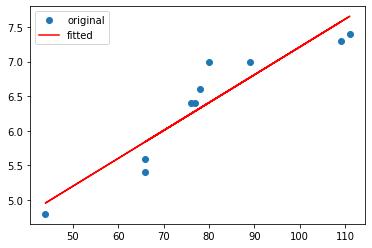

slope:		0.04025678079146288
intercept:	3.1855602489995536
r:		0.9281785008874763
p:		0.00010667565429896535
std_err:	0.005706415563603269
R squared:	0.8615153295097229


In [23]:
plot_regression_line( travel_time,miles_traveled, 'r')

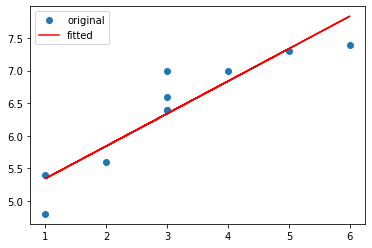

slope:		0.4982532751091703
intercept:	4.845414847161571
r:		0.916443396447027
p:		0.00019260878342962847
std_err:	0.07691975810352665
R squared:	0.8398684988913627


In [24]:
plot_regression_line( travel_time,num_deliveries, 'r')

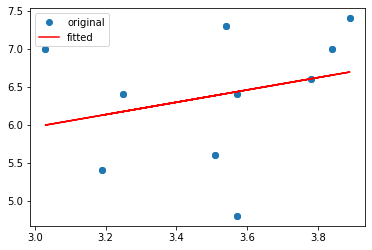

slope:		0.8113482518625464
intercept:	3.5364881981994225
r:		0.2672115310193847
p:		0.45545341268508155
std_err:	1.0344773527251407
R squared:	0.0714020023097236


In [25]:
# apparently gas price no relationship 
# with our dependet variable
# thence, we will not use it for the
# regression analysis
plt.scatter(gas_price, travel_time)
plot_regression_line( travel_time,gas_price, 'r')

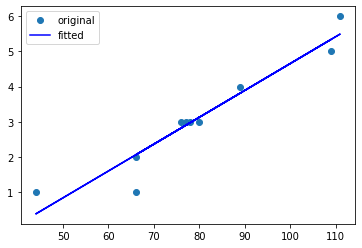

slope:		0.07625611382836818
intercept:	-2.969986660738107
r:		0.9558982066200348
p:		1.569031440766063e-05
std_err:	0.008283603024004481
R squared:	0.9137413814193986


(0.9558982066200347, 1.5690314407660772e-05)

In [26]:
# now we're going to compare the correlation 
# between independent variables
plot_regression_line( num_deliveries,miles_traveled, 'b')
stats.pearsonr(miles_traveled, num_deliveries)

(0.35579623354708517, 0.3129640590817896)

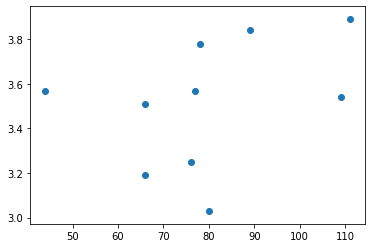

In [55]:
plt.scatter(miles_traveled, gas_price)
stats.pearsonr(miles_traveled,gas_price)
# no correlation here

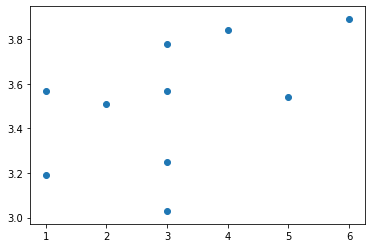

In [56]:
plt.scatter(num_deliveries, gas_price)
# no correlation here

In [57]:
stats.pearsonr(num_deliveries, gas_price)

(0.49824216474016336, 0.142741207670319)

In [58]:
# using highly correlated independent variables in
# multiple regression would be *REDUNDANT*
# therefore we should remove one of them

In [59]:
print(df)

   Miles travelled  Number of deliveries  Gas price  Travel time in hours
0               89                     4       3.84                   7.0
1               66                     1       3.19                   5.4
2               78                     3       3.78                   6.6
3              111                     6       3.89                   7.4
4               44                     1       3.57                   4.8
5               77                     3       3.57                   6.4
6               80                     3       3.03                   7.0
7               66                     2       3.51                   5.6
8              109                     5       3.54                   7.3
9               76                     3       3.25                   6.4


In [60]:
corrMatrix = df.corr()

In [61]:
print(corrMatrix)

                      Miles travelled  Number of deliveries  Gas price  \
Miles travelled              1.000000              0.955898   0.355796   
Number of deliveries         0.955898              1.000000   0.498242   
Gas price                    0.355796              0.498242   1.000000   
Travel time in hours         0.928179              0.916443   0.267212   

                      Travel time in hours  
Miles travelled                   0.928179  
Number of deliveries              0.916443  
Gas price                         0.267212  
Travel time in hours              1.000000  


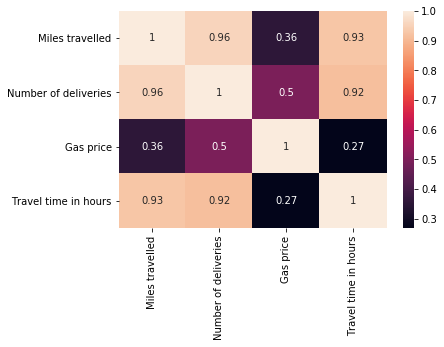

In [62]:
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [63]:
# correlations of travel time in hours with other variables

print("p-value (corr. with miles traveled):")
stats.pearsonr(travel_time, miles_traveled)[1]

p-value (corr. with miles traveled):


0.00010667565429896672

In [64]:
print("p-value (corr. with num. deliveries):")
stats.pearsonr(num_deliveries, travel_time)[1]

p-value (corr. with num. deliveries):


0.00019260878342962958

In [65]:
print("p-value (correlation with gas price):")
stats.pearsonr(gas_price, travel_time)[1]

p-value (correlation with gas price):


0.4554534126850813

In [66]:
slope, intercept, r, p, stderr = stats.linregress(miles_traveled, travel_time)

In [67]:
stderr

0.005706415563603273

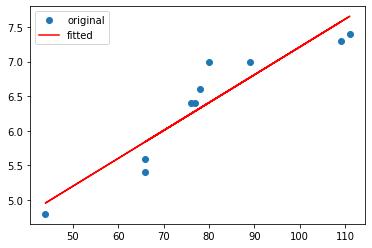

slope:		0.04025678079146288
intercept:	3.1855602489995536
r:		0.9281785008874763
p:		0.00010667565429896535
std_err:	0.005706415563603269
R squared:	0.8615153295097229


In [27]:
plot_regression_line( travel_time, miles_traveled,'r')

In [69]:
fvalue, pvalue = stats.f_oneway(miles_traveled, travel_time)

In [70]:
print(fvalue, pvalue)

133.80048730031774 9.094905493567592e-10


In [71]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [72]:
model=ols('travel_time ~ C(miles_traveled)', data=df).fit()

In [73]:
anova_table = sm.stats.anova_lm(model, typ=2)

In [74]:
anova_table

,sum_sq,df,F,PR(>F)
C(miles_traveled),6.749,8.0,42.18125,0.118554
Residual,0.020,1.0,NaN,NaN


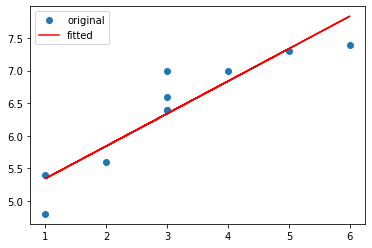

slope:		0.4982532751091703
intercept:	4.845414847161571
r:		0.916443396447027
p:		0.00019260878342962847
std_err:	0.07691975810352665
R squared:	0.8398684988913627


In [28]:
plot_regression_line( travel_time,num_deliveries, 'r')

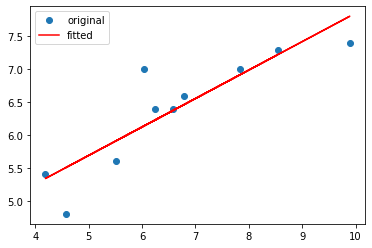

slope:		0.4331027795243974
intercept:	3.524158907887061
r:		0.8764496498900805
p:		0.00087592527234532
std_err:	0.08412197367171165
R squared:	0.7681639887924446


In [32]:
plot_regression_line(travel_time, num_deliveries + gas_price, 'r')

In [31]:
num_deliveries+gas_price

array([7.84, 4.19, 6.78, 9.89, 4.57, 6.57, 6.03, 5.51, 8.54, 6.25])